# Recurrent Neural Network Homework

This is the 4th assignment for CAP 4630 and we will implement a basic RNN network and an LSTM network with Pytorch to solve two problems. \
You will use **"Tasks"** and **"Hints"** to finish the work. **(Total 100 points, including 15 bonus points)** \
You may use Machine Learning libaries like Scikit-learn for data preprocessing.

**Task Overview:**
- Implement a basic RNN network to solve time series prediction
- Implement an LSTM network to conduct sentiment analysis

## 1 - Implement Basic RNN network with Pytorch to predict time series##
### 1.1 Prepare the data (17 Points)

Prepare time series data for deep neural network training.

**Tasks:**
1. Load the given train and test data: "train.txt" and "test.txt". **(5 Points)**
2. Generate the **TRAIN** and **TEST** labels. **(5 Points)**
3. Normalize the **TRAIN** and **TEST** data with sklearn function "MinMaxScaler". **(5 Points)**
4. **PRINT OUT** the **TEST** data and label. **(2 Points)**

**Hints:**  
1. The length of original train data is 113 which starts from **"1949-01"** to **"1958-05"**. The length of original test data is 29, which starts from **"1958-07"** to **"1960-11"**.
2. Set the data types of both train and test data to "float32".
3. When you prepared input data X (sequences) and oupt data Y (labels), please consider the following relationship:
    - The sequence X should be the **past 12** datapoints in the time series, i.e., observation sequence with historical window of 12. You may check the time series data and think about the reason.
    - The label Y should be the **next 1** datapoint in the time series (one point ahead prediction).
4. The first 3 **TRAIN** data and label should be:

- trainX[0] = [[0.02203858 &nbsp; 0.03856748 &nbsp; 0.077135 &nbsp;  0.06887051 &nbsp; 0.04683197 &nbsp; 0.08539945 &nbsp; 0.12121212 &nbsp; 0.12121212 &nbsp; 0.08815429 &nbsp; 0.04132232 &nbsp; 0.    &nbsp; 0.03856748]]
- trainY[0] = [0.03030303]

- trianX[1] = [[0.03856748 &nbsp; 0.077135 &nbsp;  0.06887051 &nbsp; 0.04683197  &nbsp; 0.08539945  &nbsp; 0.12121212  &nbsp; 0.12121212  &nbsp; 0.08815429  &nbsp; 0.04132232  &nbsp; 0.     &nbsp;  0.03856748   &nbsp; 0.03030303]]
- trainY[1] = [0.06060606]

- trainX[2] =  [[0.077135 &nbsp;  0.06887051 &nbsp; 0.04683197 &nbsp; 0.08539945 &nbsp; 0.12121212 &nbsp; 0.12121212 &nbsp; 0.08815429 &nbsp; 0.04132232 &nbsp; 0.    &nbsp;     0.03856748 &nbsp; 0.03030303 &nbsp; 0.06060606]]
- trainY[2] = [0.10192838]

5. Apply the MinMaxScaler to both the train and test data.\
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html


6. After the preparation with scaler fitting, the shapes of trainX, trainY, testX, and testY are as follows:\
trainX.shape = (101, 1, 12)\
trainY.shape = (101,)\
testX.shape = (17, 1, 12)\
testY.shape = (17,)

In [104]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load the train and test data
train_data = pd.read_csv('train.txt', header=None, skiprows=1)
test_data = pd.read_csv('test.txt', header=None, skiprows=1)

train_data = train_data.iloc[:, 1].astype('float32')
test_data = test_data.iloc[:, 1].astype('float32')

# Initialize MinMaxScaler and fit it to the train data
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(train_data.values.reshape(-1, 1))

# Function to prepare the data
def prepare_data(data, scaler):
    data_values = data.values.reshape(-1, 1)
    data_normalized = scaler.transform(data_values)
    X, Y = [], []
    for i in range(len(data_normalized) - 12):
        X.append(data_normalized[i:i + 12])
        Y.append(data_normalized[i + 12])
    return np.array(X), np.array(Y)

# Prepare TRAIN and TEST data
trainX, trainY = prepare_data(train_data, scaler)
testX, testY = prepare_data(test_data, scaler)

# Print the shapes of the prepared data
print("trainX.shape:", trainX.shape)
print("trainY.shape:", trainY.shape)
print("testX.shape:", testX.shape)
print("testY.shape:", testY.shape)

# Print the first three TRAIN data and labels
print("First three TRAIN data and labels:")
for i in range(3):
    print(f"trainX[{i}]:", trainX[i])
    print(f"trainY[{i}]:", trainY[i])

# Print the TEST data and label
print("\nTEST data and labels:")
print("testX:", testX)
print("testY:", testY)


trainX.shape: (101, 12, 1)
trainY.shape: (101, 1)
testX.shape: (17, 12, 1)
testY.shape: (17, 1)
First three TRAIN data and labels:
trainX[0]: [[0.02203858]
 [0.03856748]
 [0.077135  ]
 [0.06887051]
 [0.04683197]
 [0.08539945]
 [0.12121212]
 [0.12121212]
 [0.08815429]
 [0.04132232]
 [0.        ]
 [0.03856748]]
trainY[0]: [0.03030303]
trainX[1]: [[0.03856748]
 [0.077135  ]
 [0.06887051]
 [0.04683197]
 [0.08539945]
 [0.12121212]
 [0.12121212]
 [0.08815429]
 [0.04132232]
 [0.        ]
 [0.03856748]
 [0.03030303]]
trainY[1]: [0.06060606]
trainX[2]: [[0.077135  ]
 [0.06887051]
 [0.04683197]
 [0.08539945]
 [0.12121212]
 [0.12121212]
 [0.08815429]
 [0.04132232]
 [0.        ]
 [0.03856748]
 [0.03030303]
 [0.06060606]]
trainY[2]: [0.10192838]

TEST data and labels:
testX: [[[1.0661157 ]
  [1.1046832 ]
  [0.8264463 ]
  [0.70247936]
  [0.5674931 ]
  [0.64187324]
  [0.70523417]
  [0.6556474 ]
  [0.8319559 ]
  [0.8044077 ]
  [0.87052345]
  [1.013774  ]]

 [[1.1046832 ]
  [0.8264463 ]
  [0.70247936]


### 1.2 - Build the RNN model (20 Points) ##


Build an RNN model with RNN cell.

**Tasks:**
1. Build an RNN model with 1 RNN layer with hidden_size = 4 and 1 Linear layer.  **(10 Points)**
2. initialize model, optimizer and criterion. **(5 Points)**
3. Train the model for **1000** epochs with **batch_size = 10**. **(5 Points)**

**Hints:**  
1. You use **nn.RNN** to specify RNN cells.
2. Use loss function (criterion) **MSELoss()** and select **Adam** optimizer with **learning_rate=0.005** and other default settings.

In [105]:
### write your code here
import torch
import torch.nn as nn
import torch.optim as optim

# Define the RNN model
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.linear = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.linear(out[:, -1, :])
        return out

# Set the input size, hidden size, and output size
input_size = 1  # As we have 1 feature in the input
hidden_size = 4
output_size = 1  # As we are predicting a single value

# Initialize the model, optimizer, and loss function
model = RNNModel(input_size, hidden_size, output_size)
optimizer = optim.Adam(model.parameters(), lr=0.005)
criterion = nn.MSELoss()

# Function to create mini-batches
def create_batches(data_X, data_Y, batch_size):
    for i in range(0, len(data_X), batch_size):
        yield data_X[i:i + batch_size], data_Y[i:i + batch_size]

# Training the model
num_epochs = 1000
batch_size = 10

for epoch in range(num_epochs):
    for batch_X, batch_Y in create_batches(trainX, trainY, batch_size):
        # Convert to PyTorch tensors
        batch_X_tensor = torch.tensor(batch_X, dtype=torch.float32)
        batch_Y_tensor = torch.tensor(batch_Y, dtype=torch.float32)

        # Forward pass
        outputs = model(batch_X_tensor)
        loss = criterion(outputs, batch_Y_tensor)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

print('Training completed.')

Epoch [1/1000], Loss: 0.2405
Epoch [101/1000], Loss: 0.0004
Epoch [201/1000], Loss: 0.0002
Epoch [301/1000], Loss: 0.0003
Epoch [401/1000], Loss: 0.0000
Epoch [501/1000], Loss: 0.0006
Epoch [601/1000], Loss: 0.0011
Epoch [701/1000], Loss: 0.0002
Epoch [801/1000], Loss: 0.0014
Epoch [901/1000], Loss: 0.0000
Training completed.


### 1.3 Evaluate Predictive Model Performance (10 Points)

Predict datapoints with the observed datapoints and trained model.

**Tasks:**
1. Do direct prediction on train and test datapoints with the obtained model in section 1.2. **(2 Points)**
2. Scale the prediction results back to original representation with the scaler.(scaler.inverse_transform function) **(3 Points)**
3. Calculate root mean squared error (RMSE) and **print out** the error for **both TRAIN and TEST**. **(3 Points)**
4. **Plot** the **TEST** label and prediction. **(2 Points)**


**Hints:**  
1. Scale back the predictions with the build-in function "scaler.inverse_transform".\
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler.inverse_transform
2. For validation: **Train Score: 125.37 RMSE Test Score: 44.90 RMSE**
3. The plot for validation is shown below (observation test data are blue and prediction results are orange):
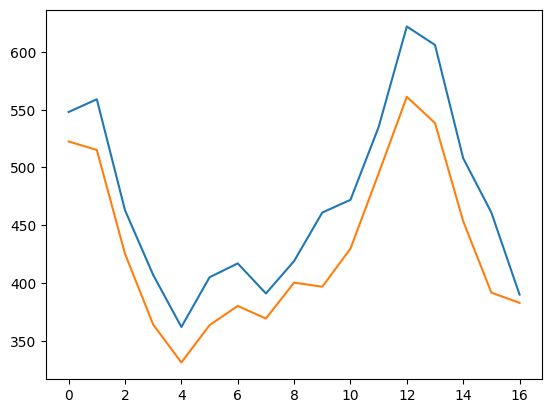

<span style="color:magenta">
**KEY FOR TAs:\
Train Score: 15.16
Test Score: 32.17 are correct.
    The corresponding figures could be different from the one above, but should be reasonable.**
</span>


Train Score: 17.38 RMSE
Test Score: 66.36 RMSE


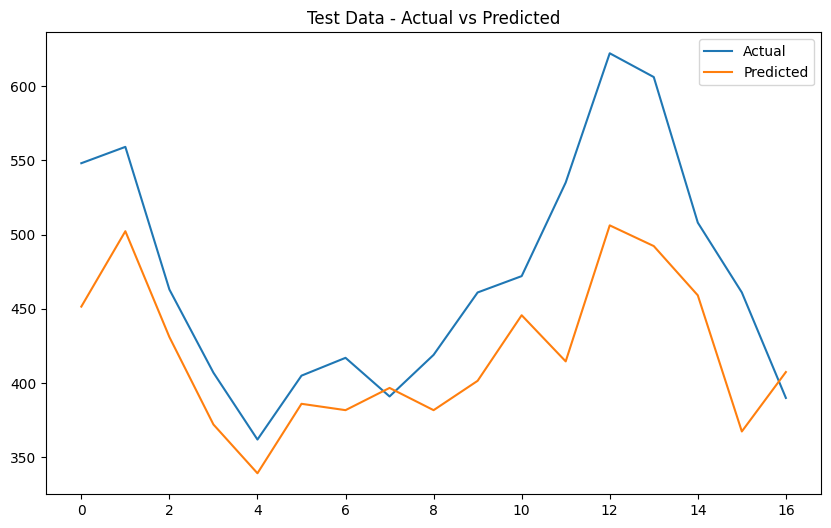

In [106]:
import torch
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Function to predict using the model
def predict(data_X, model):
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # No need to track gradients for validation
        data_X_tensor = torch.tensor(data_X, dtype=torch.float32)
        predictions = model(data_X_tensor)
    return predictions.numpy()  # Convert the predictions to a numpy array

# Predict on train and test data
train_predictions = predict(trainX, model)
test_predictions = predict(testX, model)

# Inverse transform the predictions and the true values
train_predictions_inv = scaler.inverse_transform(train_predictions)
test_predictions_inv = scaler.inverse_transform(test_predictions)
trainY_inv = scaler.inverse_transform(trainY.reshape(-1, 1))
testY_inv = scaler.inverse_transform(testY.reshape(-1, 1))

# Calculate RMSE for both train and test sets
train_rmse = np.sqrt(mean_squared_error(trainY_inv, train_predictions_inv))
test_rmse = np.sqrt(mean_squared_error(testY_inv, test_predictions_inv))

# Print out the RMSE values
print(f'Train Score: {train_rmse:.2f} RMSE')
print(f'Test Score: {test_rmse:.2f} RMSE')

# Plot the TEST labels and predictions
plt.figure(figsize=(10, 6))
plt.plot(testY_inv, label='Actual')
plt.plot(test_predictions_inv, label='Predicted')
plt.title('Test Data - Actual vs Predicted')
plt.legend()
plt.show()


## 2 - Build an LSTM model to conduct sentiment analysis ##

### 2.1 Prepare the data (13 Points) ###

Prepare IMDB data for reccurent neural network training.

**Tasks:**
1. Load the data from IMDB review dataset and **print out** the lengths of sequences. **(3 Points)**
2. Preprocess review data to meet the network input requirement by specifying **number of words=1000**, setting **the analysis length of the review = 100**, and **padding the input sequences**. **(10 Points)**

**Hints:**  
1. You may load the IMDB data with keras.datasets.imdb.load_data(num_words=max_features). Here. max_features is set to **1000**.
2. You may use keras.preprocessing.sequence.pad_sequences(x_train, maxlen) to pad the input sequences and set maxlen to **100**.
3. You can start data preprocessing from scractch with raw file, but please get ready for a whole day work.

**Note:**\
We train the built LSTM-based model with ALL training data; the **validation set** (aka **development set**) is set with the **testing set** for model evaluation. This split is common in the application with limited sampled observation data, like NLP problems.

In [4]:
### write your code here
from keras.datasets import imdb
from keras.preprocessing import sequence

# Number of words to consider as features
max_features = 1000
# Cut texts after this number of words (among top max_features most common words)
maxlen = 100

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

# Print the lengths of the sequences
print('Lengths of the first 10 training sequences:', [len(seq) for seq in x_train[:10]])
print('Lengths of the first 10 testing sequences:', [len(seq) for seq in x_test[:10]])



Loading data...
17464789/17464789 [==============================] - 1s 0us/step
Pad sequences (samples x time)
x_train shape: (25000, 100)
x_test shape: (25000, 100)
Lengths of the first 10 training sequences: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Lengths of the first 10 testing sequences: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100]


### 2.2 - Design and train LSTM model (25 Points) ###

Build an LSTM model.

**Tasks:**
1. Build the LSTM model with **1 embedding layer**, **1 LSTM layer**, and **1 Linear layer**. The embedding vector is specified with the dimension of **8**. **(10 Points)**
2. Create LSTM model with **Adam** optimizer, **binary_crossentropy** loss function (BCELoss()). **(5 Points)**  
3. Train the LSTM model with **batch_size=64 for 10 epochs** and report **training and validation accuracies over epochs**. You need to use TensorDataset and DataLoader to split the data into batches with batch_size and shuffle the data. **(5 Points)**
4. **Print out** best validation accuracy. **(5 Points)**



**Hints:**  
1. Set input dimension to **1000** and output dimension to **8** for embedding layer.
2. You need to initialize hidden(h) and cell(c) for the lstm and always use h and c as input to your lstm layer. (For performance)
3. Set **hidden dimension = 8** for LSTM layer.
4. Use only the last layer as the input of linear layer (For performance)
5. Set activation function to **sigmoid** for Linear layer.
6. Use **shuffle=True** in Dataloader to ensure data shuffle
7. You may have some trouble with the data dimension, please consider using squeeze or unsqueeze to make two data have the same dimension.
8. Write a constructor with many configurations (number of layers, embedding dimension...) could save you a lot of time for the bonus questions since you can reuse the code here.

In [7]:
### write your code here
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence

# Assuming x_train, y_train, x_test, and y_test are already defined as per block 2.1 instructions

# Convert the data to PyTorch tensors and then to a Dataset
train_data = TensorDataset(torch.from_numpy(x_train), torch.from_numpy(y_train))
test_data = TensorDataset(torch.from_numpy(x_test), torch.from_numpy(y_test))

# Define the batch size
batch_size = 64

# Create DataLoaders for train and test sets
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=batch_size)

# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.linear = nn.Linear(hidden_dim, 1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.embedding(x)
        lstm_out, (ht, ct) = self.lstm(x)
        last_hidden = ht[-1]
        out = self.linear(last_hidden)
        out = self.sigmoid(out)
        return out

# Set the input dimension, embedding dimension, and hidden dimension
input_dim = 1000
embedding_dim = 8
hidden_dim = 8

# Initialize the model
model = LSTMModel(input_dim, embedding_dim, hidden_dim)

# Define the loss function and the optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters())

# Function to calculate accuracy
def binary_accuracy(preds, y):
    rounded_preds = torch.round(preds)
    correct = (rounded_preds == y).float()
    acc = correct.sum() / len(correct)
    return acc

# Train the model
num_epochs = 10
best_val_acc = 0

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    epoch_acc = 0
    for x_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(x_batch.long()).squeeze()
        loss = criterion(y_pred, y_batch.float())
        acc = binary_accuracy(y_pred, y_batch.float())
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        epoch_acc += acc.item()
    train_loss = epoch_loss / len(train_loader)
    train_acc = epoch_acc / len(train_loader)

    # Validation phase
    model.eval()
    with torch.no_grad():
        val_loss = 0
        val_acc = 0
        for x_batch, y_batch in test_loader:
            y_pred = model(x_batch.long()).squeeze()
            val_loss += criterion(y_pred, y_batch.float()).item()
            val_acc += binary_accuracy(y_pred, y_batch.float()).item()
        val_loss /= len(test_loader)
        val_acc /= len(test_loader)
        if val_acc > best_val_acc:
            best_val_acc = val_acc

    print(f'Epoch {epoch+1}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

print(f'Best Validation Accuracy: {best_val_acc:.4f}')


Epoch 1: Train Loss: 0.6908, Train Acc: 0.5265, Val Loss: 0.6837, Val Acc: 0.5686
Epoch 2: Train Loss: 0.6614, Train Acc: 0.6062, Val Loss: 0.6333, Val Acc: 0.6478
Epoch 3: Train Loss: 0.5963, Train Acc: 0.6818, Val Loss: 0.5639, Val Acc: 0.7134
Epoch 4: Train Loss: 0.5408, Train Acc: 0.7282, Val Loss: 0.5306, Val Acc: 0.7389
Epoch 5: Train Loss: 0.5019, Train Acc: 0.7563, Val Loss: 0.5020, Val Acc: 0.7609
Epoch 6: Train Loss: 0.4700, Train Acc: 0.7810, Val Loss: 0.4744, Val Acc: 0.7753
Epoch 7: Train Loss: 0.4465, Train Acc: 0.7935, Val Loss: 0.4745, Val Acc: 0.7798
Epoch 8: Train Loss: 0.4321, Train Acc: 0.8010, Val Loss: 0.4420, Val Acc: 0.7980
Epoch 9: Train Loss: 0.4200, Train Acc: 0.8099, Val Loss: 0.4348, Val Acc: 0.7975
Epoch 10: Train Loss: 0.4070, Train Acc: 0.8180, Val Loss: 0.4287, Val Acc: 0.8061
Best Validation Accuracy: 0.8061


### 2.3 - LSTM hyperparameter tuning (Bonus 15 Points) ###

Boost the performance of obtained LSTM (aka vanilla model) by hyperparameter tuning.

**Tasks:**
Note:
- All modificiations are directly conducted based on the vanilla model above (from 2.2).
- For each scenario, **report <span style="color:red"> BEST Validation Accuracy </span> and generate Training/Validation <span style="color:red"> Accuracy plots over epochs</span>**. You may just paste the plot figures in the cells with **Markdown mode**, or leave the result after running. **Make sure it is already correctly shown in your submitted file.**
1.  Scenario 1 (**5 points**):
    - Add one additional LSTM layer (totally 2 LSTM layers).
    - Modify the embedding dimension to 16.
    - Modify the units of LSTM to 16.
2. Scenario 2 (**5 points**)
    - Add one additional LSTM layer (totally 2 LSTM layers).
    - Modify the embedding dimension to 128.
    - Modify the units of LSTM to 128.
3. Scenario 3 (**5 points**)
    - Add one additional LSTM layer (totally 2 LSTM layers).
    - Modify the embedding dimension to 128.
    - Modify the units of LSTM to 128.
    - Increase analysis length for review data to maxlen = 200
**Hints:**
1. The best method for this part is to reuse your previous code.
2. This part is very time consuming (especially for Scenario 3).


Epoch 1/10 - Test Accuracy: 0.6629
Epoch 2/10 - Test Accuracy: 0.7376
Epoch 3/10 - Test Accuracy: 0.7704
Epoch 4/10 - Test Accuracy: 0.7914
Epoch 5/10 - Test Accuracy: 0.8080
Epoch 6/10 - Test Accuracy: 0.8142
Epoch 7/10 - Test Accuracy: 0.8168
Epoch 8/10 - Test Accuracy: 0.8285
Epoch 9/10 - Test Accuracy: 0.8296
Epoch 10/10 - Test Accuracy: 0.8200
Best Test (Validation) Accuracy: 0.8296


### 2.3 - LSTM hyperparameter tuning (Bonus 15 Points) ###

Boost the performance of obtained LSTM (aka vanilla model) by hyperparameter tuning.

**Tasks:**
Note:
- All modificiations are directly conducted based on the vanilla model above (from 2.2).
- For each scenario, **report <span style="color:red"> BEST Validation Accuracy </span> and generate Training/Validation <span style="color:red"> Accuracy plots over epochs</span>**. You may just paste the plot figures in the cells with **Markdown mode**, or leave the result after running. **Make sure it is already correctly shown in your submitted file.**
1.  Scenario 1 (**5 points**):
    - Add one additional LSTM layer (totally 2 LSTM layers).
    - Modify the embedding dimension to 16.
    - Modify the units of LSTM to 16.
2. Scenario 2 (**5 points**)
    - Add one additional LSTM layer (totally 2 LSTM layers).
    - Modify the embedding dimension to 128.
    - Modify the units of LSTM to 128.
3. Scenario 3 (**5 points**)
    - Add one additional LSTM layer (totally 2 LSTM layers).
    - Modify the embedding dimension to 128.
    - Modify the units of LSTM to 128.
    - Increase analysis length for review data to maxlen = 200
**Hints:**
1. The best method for this part is to reuse your previous code.
2. This part is very time consuming (especially for Scenario 3).


Best Validation Accuracy: 0.7986


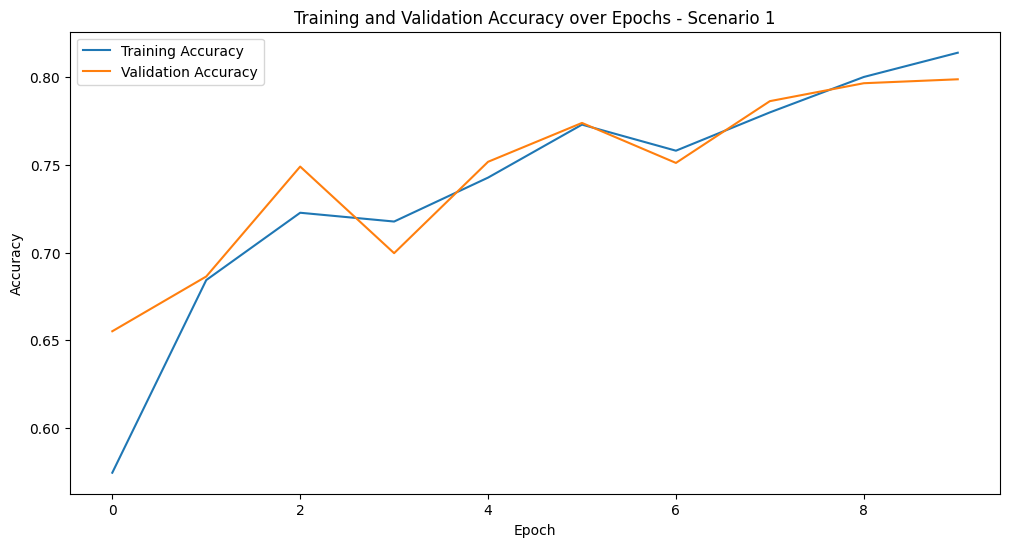

In [18]:
### write your code here
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from keras.datasets import imdb
from keras.preprocessing import sequence

# Scenario 1 parameters
embedding_dim = 16
hidden_dim = 16
num_layers = 2

# Load and preprocess the IMDB data
max_features = 1000
maxlen = 100

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

# Convert to PyTorch tensors
train_data = TensorDataset(torch.from_numpy(x_train), torch.from_numpy(y_train))
test_data = TensorDataset(torch.from_numpy(x_test), torch.from_numpy(y_test))

batch_size = 64
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=batch_size)

# Define the LSTM model with additional LSTM layer
class LSTMModel(nn.Module):
    def __init__(self):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(max_features, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        x = self.embedding(x)
        lstm_out, _ = self.lstm(x)
        out = self.linear(lstm_out[:, -1, :])
        return torch.sigmoid(out)

model = LSTMModel()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters())

# Training and validation
num_epochs = 10
best_val_accuracy = 0
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    total_loss, total_correct, total_samples = 0, 0, 0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), targets.float())
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        total_correct += ((outputs.squeeze() > 0.5) == targets).sum().item()
        total_samples += targets.size(0)

    train_accuracy = total_correct / total_samples
    train_accuracies.append(train_accuracy)

    model.eval()
    total_correct, total_samples = 0, 0
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            total_correct += ((outputs.squeeze() > 0.5) == targets).sum().item()
            total_samples += targets.size(0)

    val_accuracy = total_correct / total_samples
    val_accuracies.append(val_accuracy)
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy

print(f"Best Validation Accuracy: {best_val_accuracy}")

# Plotting the accuracies
plt.figure(figsize=(12, 6))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs - Scenario 1')
plt.legend()
plt.show()


Best Validation Accuracy: 0.8386


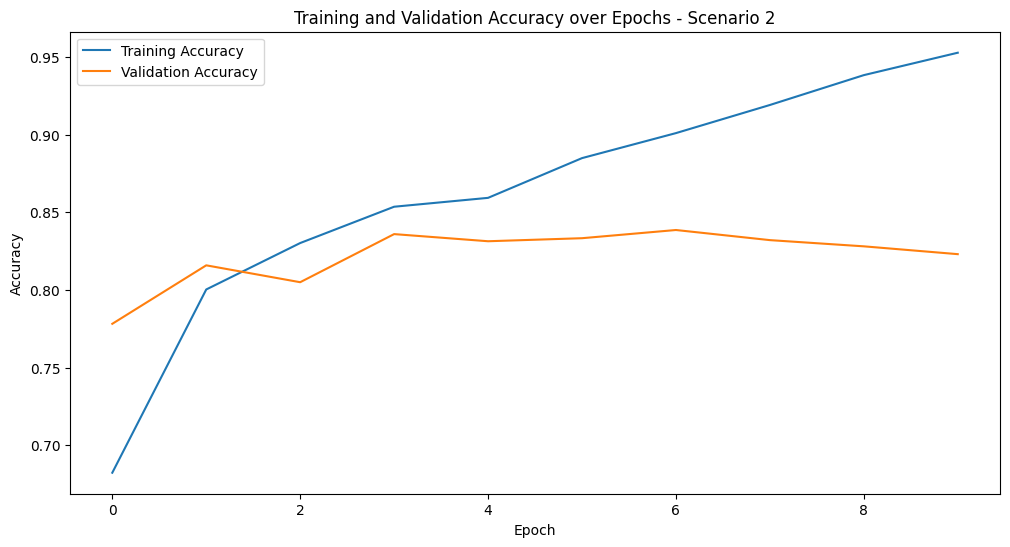

In [19]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from keras.datasets import imdb
from keras.preprocessing import sequence

# Scenario 2 parameters
embedding_dim = 128
hidden_dim = 128
num_layers = 2

# Load and preprocess the IMDB data
max_features = 1000
maxlen = 100

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

# Convert to PyTorch tensors
train_data = TensorDataset(torch.from_numpy(x_train), torch.from_numpy(y_train))
test_data = TensorDataset(torch.from_numpy(x_test), torch.from_numpy(y_test))

batch_size = 64
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=batch_size)

# Define the LSTM model with additional LSTM layer
class LSTMModel(nn.Module):
    def __init__(self):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(max_features, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        x = self.embedding(x)
        lstm_out, _ = self.lstm(x)
        out = self.linear(lstm_out[:, -1, :])
        return torch.sigmoid(out)

model = LSTMModel()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters())

# Training and validation
num_epochs = 10
best_val_accuracy = 0
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    total_loss, total_correct, total_samples = 0, 0, 0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), targets.float())
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        total_correct += ((outputs.squeeze() > 0.5) == targets).sum().item()
        total_samples += targets.size(0)

    train_accuracy = total_correct / total_samples
    train_accuracies.append(train_accuracy)

    model.eval()
    total_correct, total_samples = 0, 0
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            total_correct += ((outputs.squeeze() > 0.5) == targets).sum().item()
            total_samples += targets.size(0)

    val_accuracy = total_correct / total_samples
    val_accuracies.append(val_accuracy)
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy

print(f"Best Validation Accuracy: {best_val_accuracy}")

# Plotting the accuracies
plt.figure(figsize=(12, 6))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs - Scenario 2')
plt.legend()
plt.show()


In [23]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from keras.datasets import imdb
from keras.preprocessing import sequence

# Scenario 3 parameters
embedding_dim = 128
hidden_dim = 128
num_layers = 2
maxlen = 200  # Increased analysis length for review data

# Load and preprocess the IMDB data
max_features = 1000

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

# Convert to PyTorch tensors
train_data = TensorDataset(torch.from_numpy(x_train), torch.from_numpy(y_train))
test_data = TensorDataset(torch.from_numpy(x_test), torch.from_numpy(y_test))

batch_size = 64
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=batch_size)

# Define the LSTM model with additional LSTM layer
class LSTMModel(nn.Module):
    def __init__(self):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(max_features, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        x = self.embedding(x)
        lstm_out, _ = self.lstm(x)
        out = self.linear(lstm_out[:, -1, :])
        return torch.sigmoid(out)

model = LSTMModel()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters())

# Training and validation
num_epochs = 10
best_val_accuracy = 0
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    total_loss, total_correct, total_samples = 0, 0, 0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), targets.float())
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        total_correct += ((outputs.squeeze() > 0.5) == targets).sum().item()
        total_samples += targets.size(0)

    train_accuracy = total_correct / total_samples
    train_accuracies.append(train_accuracy)

    model.eval()
    total_correct, total_samples = 0, 0
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            total_correct += ((outputs.squeeze() > 0.5) == targets).sum().item()
            total_samples += targets.size(0)

    val_accuracy = total_correct / total_samples
    val_accuracies.append(val_accuracy)
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy

print(f"Best Validation Accuracy: {best_val_accuracy}")

# Plotting the accuracies
plt.figure(figsize=(12, 6))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs - Scenario 3')
plt.legend()
plt.show()
